This notebook reads in the simulations from the two Topology_clique notebooks, and compare the spike times.

In [1]:
import os
import numpy as np

os.environ["SNUDDA_DATA"] = "../../../../BasalGangliaData/data/"
assert os.path.isdir(os.getenv("SNUDDA_DATA")), f"You need to have BasalGangliaData installed for this example."

network_path = "topology100"
network_file = os.path.join(network_path, "network-synapses.hdf5")
simplex_file_name = os.path.join(network_path, "topology100_D6_simplices0.simplices")

ablated_network_file = os.path.join(network_path, "network-ablated.hdf5")
fully_ablated_network_file = os.path.join(network_path, "network-fully-ablated.hdf5")

ablated_simulation_file = os.path.join(network_path, "simulation", "TCS-output-6.hdf5")
fully_ablated_simulation_file = os.path.join(network_path, "simulation", "TCS-output-6a.hdf5")

In [2]:
from snudda.analyse.analyse_topology_activity import SnuddaAnalyseTopologyActivity
sat = SnuddaAnalyseTopologyActivity()

In [3]:
sat.load_simulation_data("ablated", ablated_simulation_file)
sat.load_simulation_data("fullyablated", fully_ablated_simulation_file)

Loading topology100/simulation/TCS-output-6.hdf5
Loading topology100/simulation/TCS-output-6a.hdf5


<IPython.core.display.Javascript object>


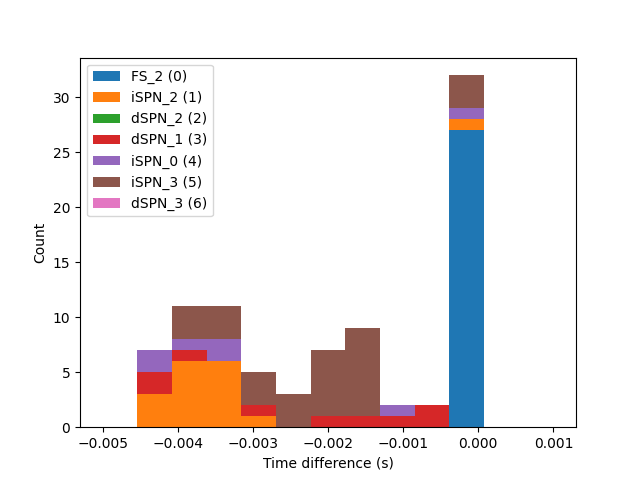

In [4]:
matching_method='order'
spike_time_diff_order = sat.get_spike_deltas("ablated", "fullyablated", matching_method=matching_method)
%matplotlib notebook
sat.plot_spike_delta_histogram("ablated", "fullyablated", matching_method=matching_method,range_min=-5e-3, range_max=1e-3)

<IPython.core.display.Javascript object>


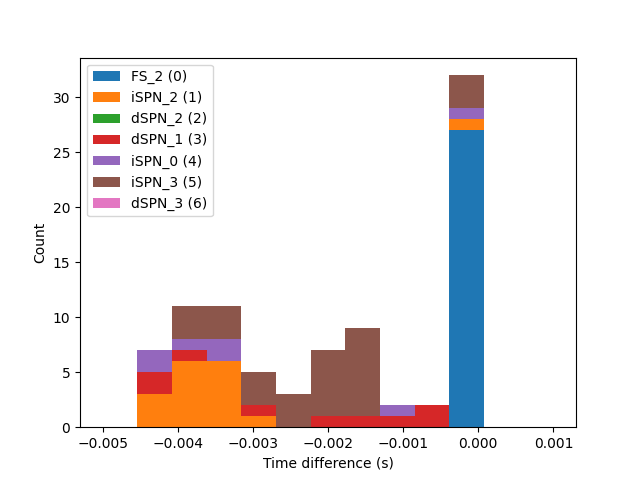

In [5]:
matching_method='closest'
spike_time_diff_closest = sat.get_spike_deltas("ablated", "fullyablated", matching_method=matching_method)
sat.plot_spike_delta_histogram("ablated", "fullyablated", matching_method=matching_method,range_min=-5e-3, range_max=1e-3)

<IPython.core.display.Javascript object>


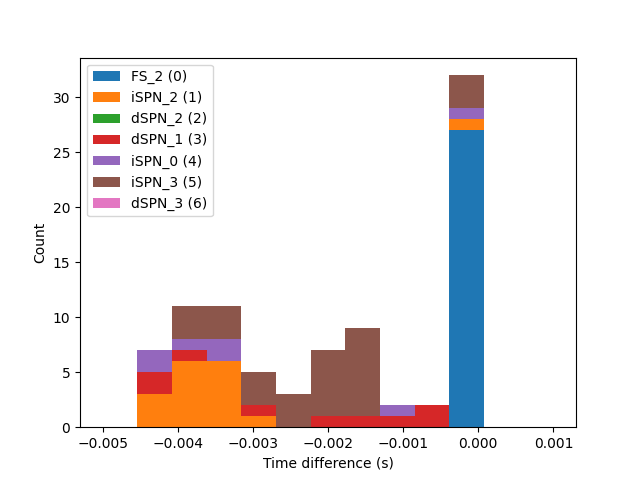

In [6]:
matching_method='closestunique'
spike_time_diff_closestunique = sat.get_spike_deltas("ablated", "fullyablated", matching_method=matching_method)
sat.plot_spike_delta_histogram("ablated", "fullyablated", matching_method=matching_method,range_min=-5e-3, range_max=1e-3)

<IPython.core.display.Javascript object>


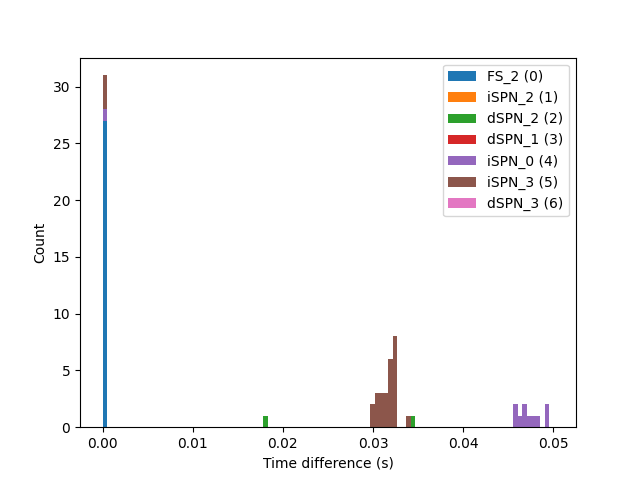

In [7]:
matching_method='spike_triggered'
spike_time_diff_closestunique = sat.get_spike_deltas("ablated", "fullyablated", matching_method=matching_method)
sat.plot_spike_delta_histogram("ablated", "fullyablated", matching_method=matching_method,range_min=0, range_max=50e-3)

experiment_config_file = "topology_clique_simulation_experiment-6.json"
from snudda.simulate.pair_recording import PairRecording 
pr = PairRecording(network_path=network_path, network_file=ablated_network_file,
                   experiment_config_file=experiment_config_file)

pr.plot_trace_overview()

In [8]:
trigger_times=np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

<IPython.core.display.Javascript object>


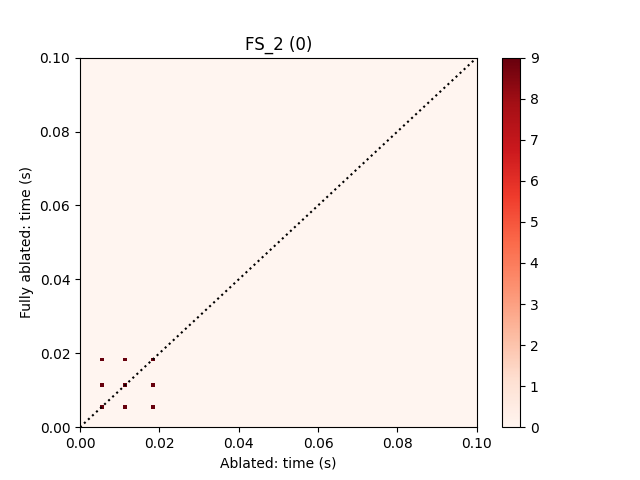

<IPython.core.display.Javascript object>


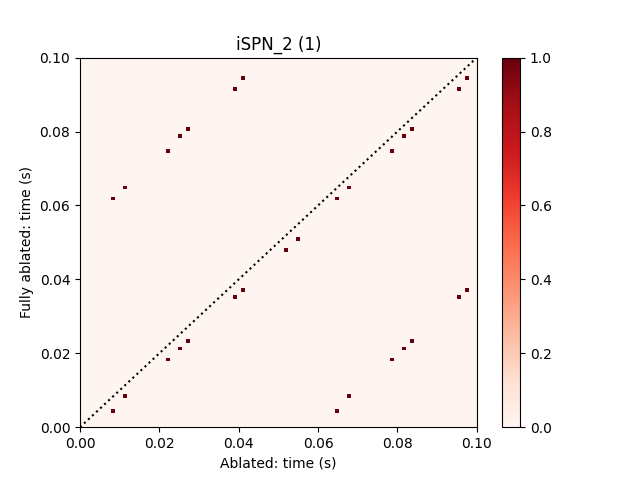

<IPython.core.display.Javascript object>


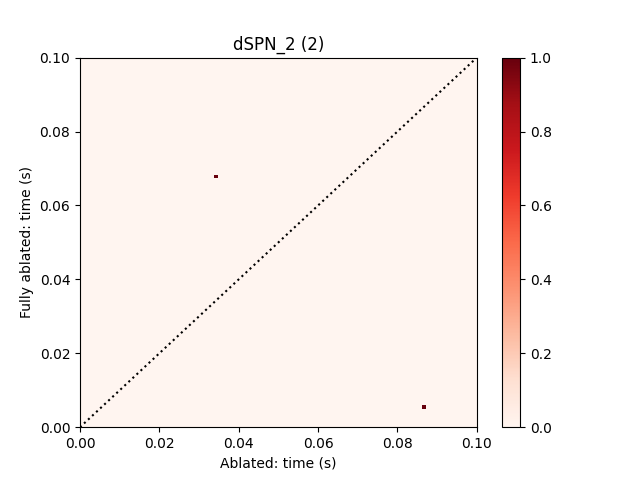

<IPython.core.display.Javascript object>


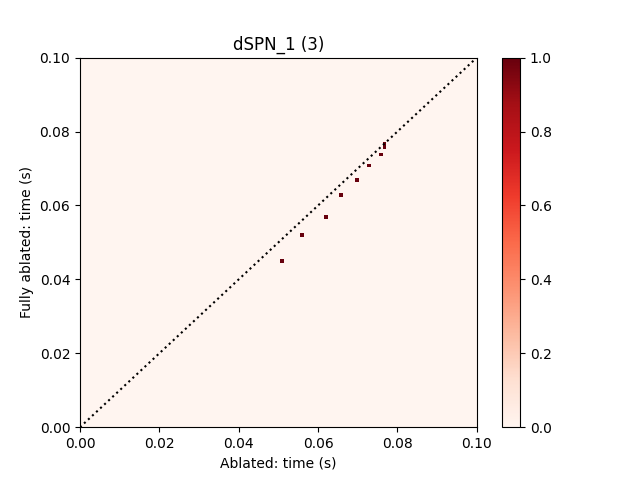

<IPython.core.display.Javascript object>


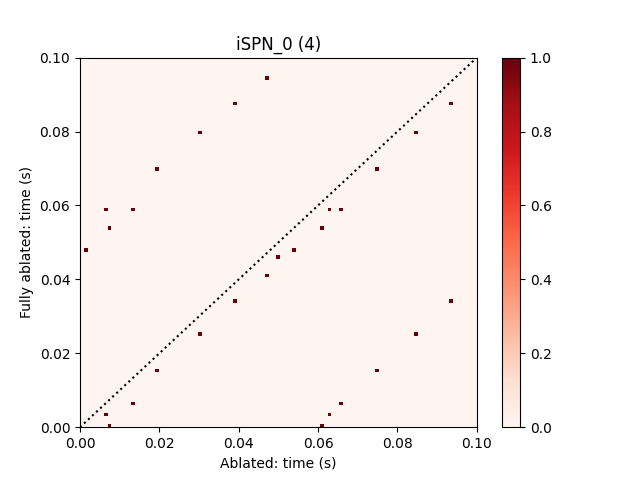

<IPython.core.display.Javascript object>


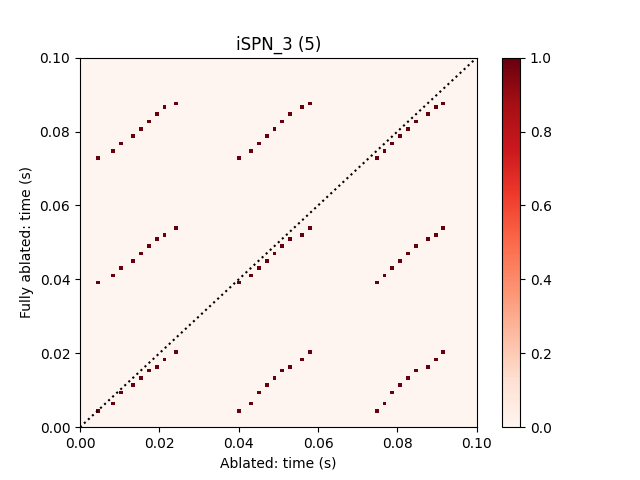

<IPython.core.display.Javascript object>


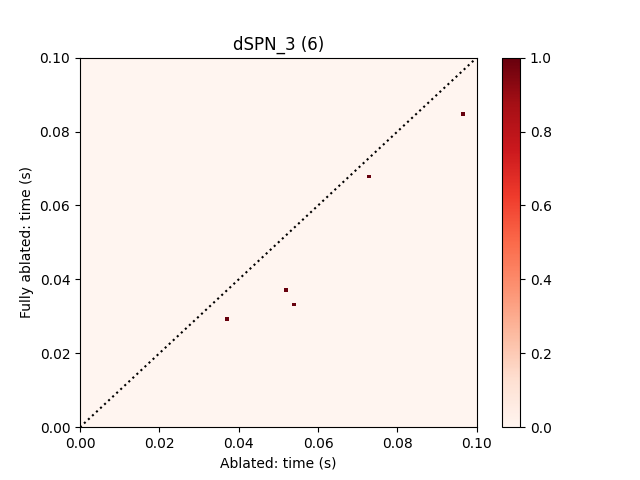

In [9]:
sat.plot_jpsth_all("ablated", "fullyablated", trigger_times=trigger_times, duration=0.1, bin_size=1e-3)